In [1]:
!pip install torchinfo

In [5]:
!git clone https://github.com/anantgupta129/ERA-V1.git

Cloning into 'ERA-V1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 152 (delta 68), reused 129 (delta 46), pack-reused 0
Receiving objects: 100% (152/152), 2.28 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [6]:
# !rm -rf /content/ERA-V1
%cd ERA-V1/session9

/content/ERA-V1/session9


In [7]:
import torch
from torchvision import transforms as T

import torch.optim as optim

from models import Net
from dataset import build_cifar
from utils import Trainer, plot_sampledata, plot_misclassified, per_class_accuracy

# Load Data

In [5]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_loader = build_cifar(set="train", **kwargs)
test_loader = build_cifar(set="test", **kwargs)

100%|██████████| 170498071/170498071 [00:01<00:00, 104927970.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)

cuda


In [9]:
model.summarize(device, (1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Sequential: 1-1                        [1, 32, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           864
│    └─BatchNorm2d: 2-2                  [1, 32, 32, 32]           64
│    └─ReLU: 2-3                         [1, 32, 32, 32]           --
│    └─Dropout2d: 2-4                    [1, 32, 32, 32]           --
│    └─DepthwiseSeparable: 2-5           [1, 32, 32, 32]           --
│    │    └─Conv2d: 3-1                  [1, 32, 32, 32]           288
│    │    └─Conv2d: 3-2                  [1, 32, 32, 32]           1,024
│    └─BatchNorm2d: 2-6                  [1, 32, 32, 32]           64
│    └─ReLU: 2-7                         [1, 32, 32, 32]           --
│    └─Dropout2d: 2-8                    [1, 32, 32, 32]           --
│    └─Conv2d: 2-9                       [1, 32, 16, 16]           9,216
│    └─

In [8]:
num_epochs = 100
model = Net(drop=0.00).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.1, epochs=num_epochs, steps_per_epoch=len(train_loader)
)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# scheduler = None

trainer = Trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)
    # scheduler.step()

Epoch 1


Train: Loss=1.6453 Batch_id=390 Accuracy=29.26: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]


Test set: Average loss: 1.5514, Accuracy: 4285/10000 (42.85%)

Epoch 2


Train: Loss=1.4999 Batch_id=390 Accuracy=42.87: 100%|██████████| 391/391 [00:17<00:00, 22.73it/s]


Test set: Average loss: 1.3195, Accuracy: 5182/10000 (51.82%)

Epoch 3


Train: Loss=1.4643 Batch_id=390 Accuracy=47.87: 100%|██████████| 391/391 [00:16<00:00, 23.52it/s]


Test set: Average loss: 1.3286, Accuracy: 5235/10000 (52.35%)

Epoch 4


Train: Loss=1.0959 Batch_id=390 Accuracy=51.07: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]


Test set: Average loss: 1.2135, Accuracy: 5619/10000 (56.19%)

Epoch 5


Train: Loss=1.3282 Batch_id=390 Accuracy=53.30: 100%|██████████| 391/391 [00:16<00:00, 23.41it/s]


Test set: Average loss: 1.0971, Accuracy: 6022/10000 (60.22%)

Epoch 6


Train: Loss=1.2383 Batch_id=390 Accuracy=55.52: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]


Test set: Average loss: 1.0394, Accuracy: 6317/10000 (63.17%)

Epoch 7


Train: Loss=1.2843 Batch_id=390 Accuracy=57.02: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]


Test set: Average loss: 1.0736, Accuracy: 6142/10000 (61.42%)

Epoch 8


Train: Loss=1.2241 Batch_id=390 Accuracy=58.76: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s]


Test set: Average loss: 0.9746, Accuracy: 6560/10000 (65.60%)

Epoch 9


Train: Loss=1.3420 Batch_id=390 Accuracy=59.83: 100%|██████████| 391/391 [00:16<00:00, 23.61it/s]


Test set: Average loss: 1.1154, Accuracy: 6138/10000 (61.38%)

Epoch 10


Train: Loss=0.9218 Batch_id=390 Accuracy=60.93: 100%|██████████| 391/391 [00:17<00:00, 22.74it/s]


Test set: Average loss: 1.0120, Accuracy: 6471/10000 (64.71%)

Epoch 11


Train: Loss=1.1290 Batch_id=390 Accuracy=61.95: 100%|██████████| 391/391 [00:16<00:00, 23.59it/s]


Test set: Average loss: 0.8882, Accuracy: 6962/10000 (69.62%)

Epoch 12


Train: Loss=1.0859 Batch_id=390 Accuracy=62.75: 100%|██████████| 391/391 [00:16<00:00, 23.56it/s]


Test set: Average loss: 0.8216, Accuracy: 7190/10000 (71.90%)

Epoch 13


Train: Loss=0.8238 Batch_id=390 Accuracy=63.90: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]


Test set: Average loss: 0.8354, Accuracy: 7126/10000 (71.26%)

Epoch 14


Train: Loss=0.8582 Batch_id=390 Accuracy=64.56: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]


Test set: Average loss: 0.8511, Accuracy: 7114/10000 (71.14%)

Epoch 15


Train: Loss=0.8721 Batch_id=390 Accuracy=64.58: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


Test set: Average loss: 0.7538, Accuracy: 7462/10000 (74.62%)

Epoch 16


Train: Loss=0.8765 Batch_id=390 Accuracy=65.64: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s]


Test set: Average loss: 0.7997, Accuracy: 7242/10000 (72.42%)

Epoch 17


Train: Loss=0.8406 Batch_id=390 Accuracy=66.45: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]


Test set: Average loss: 0.8090, Accuracy: 7308/10000 (73.08%)

Epoch 18


Train: Loss=0.8626 Batch_id=390 Accuracy=66.83: 100%|██████████| 391/391 [00:16<00:00, 23.57it/s]


Test set: Average loss: 0.7358, Accuracy: 7494/10000 (74.94%)

Epoch 19


Train: Loss=1.0168 Batch_id=390 Accuracy=67.01: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]


Test set: Average loss: 0.7560, Accuracy: 7424/10000 (74.24%)

Epoch 20


Train: Loss=0.7342 Batch_id=390 Accuracy=67.78: 100%|██████████| 391/391 [00:16<00:00, 23.57it/s]


Test set: Average loss: 0.7347, Accuracy: 7489/10000 (74.89%)

Epoch 21


Train: Loss=1.1046 Batch_id=390 Accuracy=67.90: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]


Test set: Average loss: 0.8102, Accuracy: 7242/10000 (72.42%)

Epoch 22


Train: Loss=0.9427 Batch_id=390 Accuracy=68.43: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]


Test set: Average loss: 0.7063, Accuracy: 7576/10000 (75.76%)

Epoch 23


Train: Loss=0.8427 Batch_id=390 Accuracy=68.66: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


Test set: Average loss: 0.7699, Accuracy: 7458/10000 (74.58%)

Epoch 24


Train: Loss=0.7771 Batch_id=390 Accuracy=69.18: 100%|██████████| 391/391 [00:16<00:00, 23.52it/s]


Test set: Average loss: 0.7199, Accuracy: 7610/10000 (76.10%)

Epoch 25


Train: Loss=0.8889 Batch_id=390 Accuracy=69.71: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]


Test set: Average loss: 0.7411, Accuracy: 7509/10000 (75.09%)

Epoch 26


Train: Loss=0.8636 Batch_id=390 Accuracy=69.67: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]


Test set: Average loss: 0.7503, Accuracy: 7557/10000 (75.57%)

Epoch 27


Train: Loss=0.8895 Batch_id=390 Accuracy=70.39: 100%|██████████| 391/391 [00:16<00:00, 23.59it/s]


Test set: Average loss: 0.6269, Accuracy: 7814/10000 (78.14%)

Epoch 28


Train: Loss=0.9782 Batch_id=390 Accuracy=70.42: 100%|██████████| 391/391 [00:16<00:00, 23.66it/s]


Test set: Average loss: 0.6921, Accuracy: 7677/10000 (76.77%)

Epoch 29


Train: Loss=0.6247 Batch_id=390 Accuracy=70.59: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


Test set: Average loss: 0.7186, Accuracy: 7554/10000 (75.54%)

Epoch 30


Train: Loss=1.0668 Batch_id=390 Accuracy=71.07: 100%|██████████| 391/391 [00:17<00:00, 22.88it/s]


Test set: Average loss: 0.6317, Accuracy: 7806/10000 (78.06%)

Epoch 31


Train: Loss=0.8304 Batch_id=390 Accuracy=71.40: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]


Test set: Average loss: 0.6317, Accuracy: 7851/10000 (78.51%)

Epoch 32


Train: Loss=0.8792 Batch_id=390 Accuracy=71.74: 100%|██████████| 391/391 [00:17<00:00, 22.29it/s]


Test set: Average loss: 0.6337, Accuracy: 7855/10000 (78.55%)

Epoch 33


Train: Loss=0.9242 Batch_id=390 Accuracy=72.06: 100%|██████████| 391/391 [00:16<00:00, 23.47it/s]


Test set: Average loss: 0.6351, Accuracy: 7856/10000 (78.56%)

Epoch 34


Train: Loss=1.0276 Batch_id=390 Accuracy=71.85: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]


Test set: Average loss: 0.6809, Accuracy: 7699/10000 (76.99%)

Epoch 35


Train: Loss=1.0675 Batch_id=390 Accuracy=72.39: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


Test set: Average loss: 0.6841, Accuracy: 7757/10000 (77.57%)

Epoch 36


Train: Loss=0.7994 Batch_id=390 Accuracy=72.54: 100%|██████████| 391/391 [00:17<00:00, 21.96it/s]


Test set: Average loss: 0.5907, Accuracy: 8036/10000 (80.36%)

Epoch 37


Train: Loss=0.7329 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]


Test set: Average loss: 0.6504, Accuracy: 7917/10000 (79.17%)

Epoch 38


Train: Loss=0.6490 Batch_id=390 Accuracy=72.85: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]


Test set: Average loss: 0.6182, Accuracy: 7927/10000 (79.27%)

Epoch 39


Train: Loss=1.0198 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]


Test set: Average loss: 0.6414, Accuracy: 7866/10000 (78.66%)

Epoch 40


Train: Loss=0.8691 Batch_id=390 Accuracy=73.19: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]


Test set: Average loss: 0.6918, Accuracy: 7612/10000 (76.12%)

Epoch 41


Train: Loss=0.8781 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]


Test set: Average loss: 0.5582, Accuracy: 8118/10000 (81.18%)

Epoch 42


Train: Loss=0.8569 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]


Test set: Average loss: 0.7334, Accuracy: 7699/10000 (76.99%)

Epoch 43


Train: Loss=0.7329 Batch_id=390 Accuracy=73.80: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]


Test set: Average loss: 0.5657, Accuracy: 8103/10000 (81.03%)

Epoch 44


Train: Loss=0.9228 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:17<00:00, 23.00it/s]


Test set: Average loss: 0.6175, Accuracy: 7944/10000 (79.44%)

Epoch 45


Train: Loss=0.8697 Batch_id=390 Accuracy=73.73: 100%|██████████| 391/391 [00:16<00:00, 23.43it/s]


Test set: Average loss: 0.5648, Accuracy: 8090/10000 (80.90%)

Epoch 46


Train: Loss=0.7897 Batch_id=390 Accuracy=74.34: 100%|██████████| 391/391 [00:16<00:00, 23.05it/s]


Test set: Average loss: 0.5852, Accuracy: 8001/10000 (80.01%)

Epoch 47


Train: Loss=0.7472 Batch_id=390 Accuracy=74.42: 100%|██████████| 391/391 [00:16<00:00, 23.30it/s]


Test set: Average loss: 0.6182, Accuracy: 7962/10000 (79.62%)

Epoch 48


Train: Loss=0.7854 Batch_id=390 Accuracy=74.08: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]


Test set: Average loss: 0.5629, Accuracy: 8102/10000 (81.02%)

Epoch 49


Train: Loss=0.7742 Batch_id=390 Accuracy=74.79: 100%|██████████| 391/391 [00:16<00:00, 23.29it/s]


Test set: Average loss: 0.5364, Accuracy: 8168/10000 (81.68%)

Epoch 50


Train: Loss=0.8253 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.5500, Accuracy: 8149/10000 (81.49%)

Epoch 51


Train: Loss=0.6855 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:16<00:00, 23.32it/s]


Test set: Average loss: 0.5207, Accuracy: 8258/10000 (82.58%)

Epoch 52


Train: Loss=0.5447 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]


Test set: Average loss: 0.5605, Accuracy: 8116/10000 (81.16%)

Epoch 53


Train: Loss=0.5750 Batch_id=390 Accuracy=75.11: 100%|██████████| 391/391 [00:16<00:00, 23.48it/s]


Test set: Average loss: 0.5587, Accuracy: 8170/10000 (81.70%)

Epoch 54


Train: Loss=0.6258 Batch_id=390 Accuracy=75.31: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]


Test set: Average loss: 0.5982, Accuracy: 7994/10000 (79.94%)

Epoch 55


Train: Loss=0.5809 Batch_id=390 Accuracy=75.42: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]


Test set: Average loss: 0.5234, Accuracy: 8250/10000 (82.50%)

Epoch 56


Train: Loss=0.6458 Batch_id=390 Accuracy=75.53: 100%|██████████| 391/391 [00:17<00:00, 22.94it/s]


Test set: Average loss: 0.5316, Accuracy: 8202/10000 (82.02%)

Epoch 57


Train: Loss=0.6363 Batch_id=390 Accuracy=75.32: 100%|██████████| 391/391 [00:17<00:00, 22.97it/s]


Test set: Average loss: 0.5286, Accuracy: 8259/10000 (82.59%)

Epoch 58


Train: Loss=0.9170 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:16<00:00, 23.06it/s]


Test set: Average loss: 0.5136, Accuracy: 8276/10000 (82.76%)

Epoch 59


Train: Loss=0.7980 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [00:16<00:00, 23.31it/s]


Test set: Average loss: 0.5055, Accuracy: 8267/10000 (82.67%)

Epoch 60


Train: Loss=0.8845 Batch_id=390 Accuracy=75.81: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]


Test set: Average loss: 0.5346, Accuracy: 8216/10000 (82.16%)

Epoch 61


Train: Loss=0.8389 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


Test set: Average loss: 0.5201, Accuracy: 8244/10000 (82.44%)

Epoch 62


Train: Loss=0.6272 Batch_id=390 Accuracy=75.98: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]


Test set: Average loss: 0.5275, Accuracy: 8239/10000 (82.39%)

Epoch 63


Train: Loss=0.6929 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]


Test set: Average loss: 0.5146, Accuracy: 8266/10000 (82.66%)

Epoch 64


Train: Loss=0.7387 Batch_id=390 Accuracy=76.13: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]


Test set: Average loss: 0.5132, Accuracy: 8272/10000 (82.72%)

Epoch 65


Train: Loss=0.8517 Batch_id=390 Accuracy=75.97: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]


Test set: Average loss: 0.5078, Accuracy: 8309/10000 (83.09%)

Epoch 66


Train: Loss=0.6417 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]


Test set: Average loss: 0.4885, Accuracy: 8355/10000 (83.55%)

Epoch 67


Train: Loss=0.7952 Batch_id=390 Accuracy=76.40: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]


Test set: Average loss: 0.4995, Accuracy: 8280/10000 (82.80%)

Epoch 68


Train: Loss=0.7483 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]


Test set: Average loss: 0.4851, Accuracy: 8389/10000 (83.89%)

Epoch 69


Train: Loss=0.7646 Batch_id=390 Accuracy=76.86: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]


Test set: Average loss: 0.4773, Accuracy: 8351/10000 (83.51%)

Epoch 70


Train: Loss=0.8597 Batch_id=390 Accuracy=76.86: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]


Test set: Average loss: 0.4708, Accuracy: 8397/10000 (83.97%)

Epoch 71


Train: Loss=0.6049 Batch_id=390 Accuracy=76.98: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]


Test set: Average loss: 0.5046, Accuracy: 8310/10000 (83.10%)

Epoch 72


Train: Loss=0.7521 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]


Test set: Average loss: 0.4718, Accuracy: 8364/10000 (83.64%)

Epoch 73


Train: Loss=0.6705 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.4549, Accuracy: 8467/10000 (84.67%)

Epoch 74


Train: Loss=0.6315 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]


Test set: Average loss: 0.4581, Accuracy: 8440/10000 (84.40%)

Epoch 75


Train: Loss=0.4541 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]


Test set: Average loss: 0.4717, Accuracy: 8456/10000 (84.56%)

Epoch 76


Train: Loss=0.6086 Batch_id=390 Accuracy=77.97: 100%|██████████| 391/391 [00:17<00:00, 23.00it/s]


Test set: Average loss: 0.4700, Accuracy: 8432/10000 (84.32%)

Epoch 77


Train: Loss=0.6518 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]


Test set: Average loss: 0.4599, Accuracy: 8445/10000 (84.45%)

Epoch 78


Train: Loss=0.5518 Batch_id=390 Accuracy=77.85: 100%|██████████| 391/391 [00:17<00:00, 22.93it/s]


Test set: Average loss: 0.4504, Accuracy: 8485/10000 (84.85%)

Epoch 79


Train: Loss=0.7917 Batch_id=390 Accuracy=77.95: 100%|██████████| 391/391 [00:19<00:00, 20.37it/s]


Test set: Average loss: 0.4410, Accuracy: 8507/10000 (85.07%)

Epoch 80


Train: Loss=0.7605 Batch_id=390 Accuracy=78.01: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]


Test set: Average loss: 0.4502, Accuracy: 8496/10000 (84.96%)

Epoch 81


Train: Loss=0.7418 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]


Test set: Average loss: 0.4465, Accuracy: 8502/10000 (85.02%)

Epoch 82


Train: Loss=0.5577 Batch_id=390 Accuracy=78.46: 100%|██████████| 391/391 [00:16<00:00, 23.33it/s]


Test set: Average loss: 0.4655, Accuracy: 8461/10000 (84.61%)

Epoch 83


Train: Loss=0.5969 Batch_id=390 Accuracy=78.17: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]


Test set: Average loss: 0.4393, Accuracy: 8532/10000 (85.32%)

Epoch 84


Train: Loss=0.7458 Batch_id=390 Accuracy=78.73: 100%|██████████| 391/391 [00:17<00:00, 22.97it/s]


Test set: Average loss: 0.4329, Accuracy: 8570/10000 (85.70%)

Epoch 85


Train: Loss=0.7264 Batch_id=390 Accuracy=78.70: 100%|██████████| 391/391 [00:17<00:00, 22.78it/s]


Test set: Average loss: 0.4373, Accuracy: 8542/10000 (85.42%)

Epoch 86


Train: Loss=0.7799 Batch_id=390 Accuracy=78.93: 100%|██████████| 391/391 [00:16<00:00, 23.48it/s]


Test set: Average loss: 0.4374, Accuracy: 8526/10000 (85.26%)

Epoch 87


Train: Loss=0.5800 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:16<00:00, 23.30it/s]


Test set: Average loss: 0.4270, Accuracy: 8546/10000 (85.46%)

Epoch 88


Train: Loss=0.7201 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]


Test set: Average loss: 0.4288, Accuracy: 8565/10000 (85.65%)

Epoch 89


Train: Loss=0.4758 Batch_id=390 Accuracy=79.31: 100%|██████████| 391/391 [00:16<00:00, 23.53it/s]


Test set: Average loss: 0.4267, Accuracy: 8581/10000 (85.81%)

Epoch 90


Train: Loss=0.3816 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]


Test set: Average loss: 0.4241, Accuracy: 8575/10000 (85.75%)

Epoch 91


Train: Loss=0.4821 Batch_id=390 Accuracy=79.51: 100%|██████████| 391/391 [00:16<00:00, 23.57it/s]


Test set: Average loss: 0.4251, Accuracy: 8592/10000 (85.92%)

Epoch 92


Train: Loss=0.5572 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]


Test set: Average loss: 0.4234, Accuracy: 8601/10000 (86.01%)

Epoch 93


Train: Loss=0.6196 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:16<00:00, 23.46it/s]


Test set: Average loss: 0.4247, Accuracy: 8591/10000 (85.91%)

Epoch 94


Train: Loss=0.6838 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:17<00:00, 22.55it/s]


Test set: Average loss: 0.4217, Accuracy: 8592/10000 (85.92%)

Epoch 95


Train: Loss=0.4398 Batch_id=390 Accuracy=79.68: 100%|██████████| 391/391 [00:16<00:00, 23.30it/s]


Test set: Average loss: 0.4226, Accuracy: 8611/10000 (86.11%)

Epoch 96


Train: Loss=0.6096 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]


Test set: Average loss: 0.4203, Accuracy: 8597/10000 (85.97%)

Epoch 97


Train: Loss=0.5627 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:16<00:00, 23.67it/s]


Test set: Average loss: 0.4194, Accuracy: 8625/10000 (86.25%)

Epoch 98


Train: Loss=0.5430 Batch_id=390 Accuracy=79.74: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]


Test set: Average loss: 0.4177, Accuracy: 8614/10000 (86.14%)

Epoch 99


Train: Loss=0.6175 Batch_id=390 Accuracy=79.98: 100%|██████████| 391/391 [00:16<00:00, 23.79it/s]


Test set: Average loss: 0.4173, Accuracy: 8623/10000 (86.23%)

Epoch 100


Train: Loss=0.4725 Batch_id=390 Accuracy=80.04: 100%|██████████| 391/391 [00:18<00:00, 20.59it/s]


Test set: Average loss: 0.4186, Accuracy: 8618/10000 (86.18%)



Set	 Max Acc@Epoch	 Last Epoch Acc
train	 80.04@100		80.04
test	 86.25@97		86.18


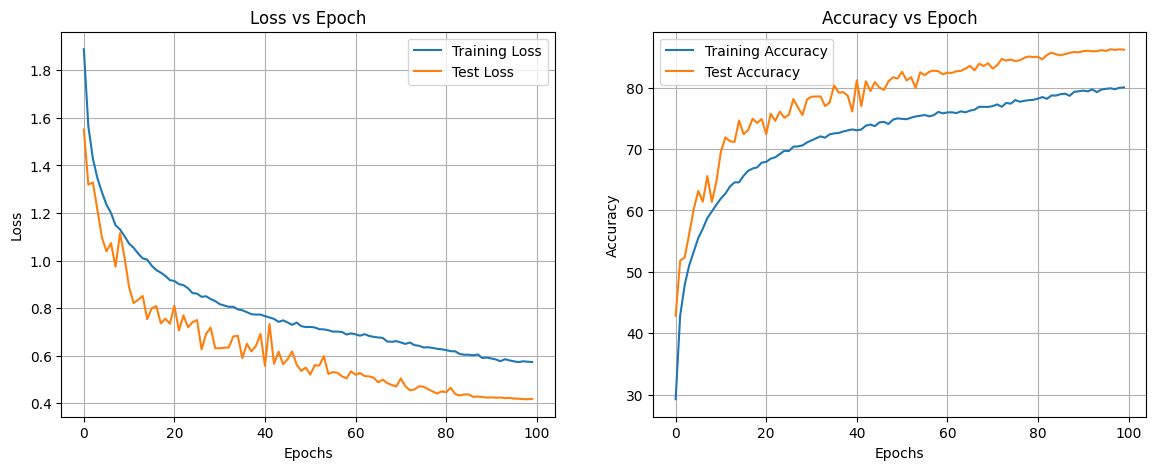

In [9]:
trainer.plot_history()

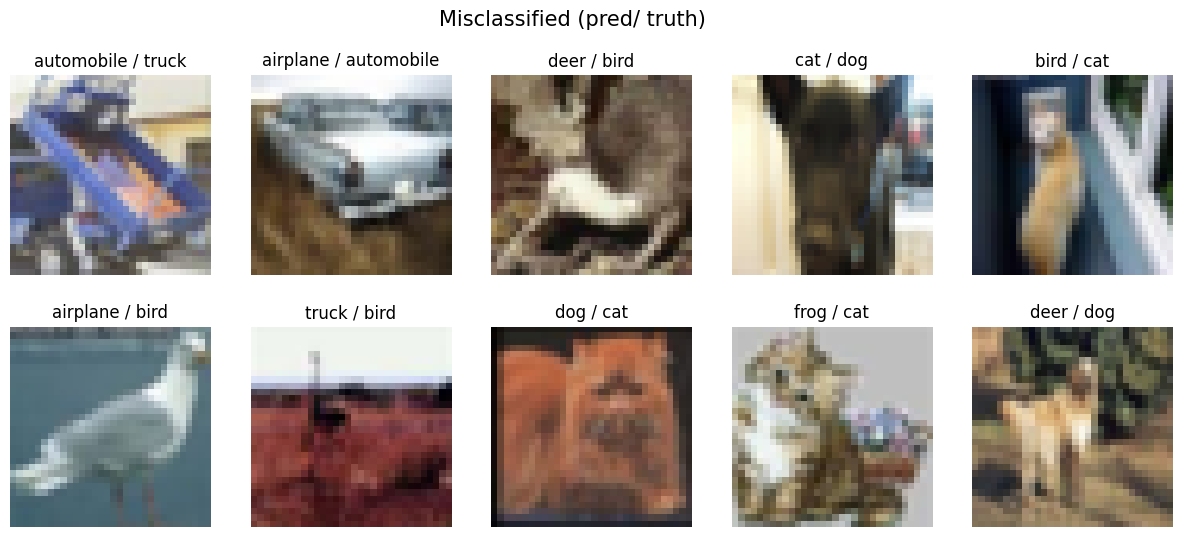

In [10]:
from dataset import make_transform

test_transforms = make_transform("test")
plot_misclassified(model, test_loader, device, test_transforms)

In [11]:
per_class_accuracy(model, device, test_loader)

[x] Accuracy of ::
	[*] airplane : 88 %
	[*] automobile : 96 %
	[*]     bird : 81 %
	[*]      cat : 73 %
	[*]     deer : 78 %
	[*]      dog : 80 %
	[*]     frog : 91 %
	[*]    horse : 88 %
	[*]     ship : 94 %
	[*]    truck : 91 %
